In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
vg_ratings_path = Path('..//Cleaned Data//video_games_ratings.csv')
vg_ratings = pd.read_csv(vg_ratings_path)
vg_ratings.head()

,name,id,category,first_release_date,genres,release_dates,rating,rating_count,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count
0,"""Two Draw""",74340,0,2017-10-19,"['Strategy', 'Indie']","[[Timestamp('2017-10-19 00:00:00')], [Timestam...",70.000000,0.0,70.000000,0.0,NaN,NaN
1,#Archery,32298,0,2017-03-30,"['Sport', 'Indie']","[[Timestamp('2017-03-30 00:00:00')], [Timestam...",50.000000,0.0,50.000000,0.0,NaN,NaN
2,#Breakforcist Battle,96199,11,2018-04-12,"['Puzzle', 'Indie', 'Arcade']","[[Timestamp('2018-04-12 00:00:00'), Timestamp(...",63.000000,0.0,63.000000,0.0,NaN,NaN
3,#IDARB,9888,0,2015-01-30,"['Platform', 'Sport', 'Indie']","[[Timestamp('2015-01-30 00:00:00'), Timestamp(...",77.953028,8.0,78.101514,12.0,78.25,4.0
4,#Killallzombies,26369,0,2014-10-28,"['Shooter', 'Indie', 'Arcade']","[[Timestamp('2014-10-28 00:00:00'), Timestamp(...",70.000000,2.0,67.500000,3.0,65.00,1.0


In [3]:
#split the games into 10 groups based on rating (0-10, 11-20, ... 91-100)
vg_ratings['rating_bins'] = pd.cut(vg_ratings['rating'], bins=10, labels=False) * 10
vg_ratings

,name,id,category,first_release_date,genres,release_dates,rating,rating_count,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count,rating_bins
0,"""Two Draw""",74340,0,2017-10-19,"['Strategy', 'Indie']","[[Timestamp('2017-10-19 00:00:00')], [Timestam...",70.000000,0.0,70.000000,0.0,NaN,NaN,60
1,#Archery,32298,0,2017-03-30,"['Sport', 'Indie']","[[Timestamp('2017-03-30 00:00:00')], [Timestam...",50.000000,0.0,50.000000,0.0,NaN,NaN,40
2,#Breakforcist Battle,96199,11,2018-04-12,"['Puzzle', 'Indie', 'Arcade']","[[Timestamp('2018-04-12 00:00:00'), Timestamp(...",63.000000,0.0,63.000000,0.0,NaN,NaN,50
3,#IDARB,9888,0,2015-01-30,"['Platform', 'Sport', 'Indie']","[[Timestamp('2015-01-30 00:00:00'), Timestamp(...",77.953028,8.0,78.101514,12.0,78.25,4.0,70
4,#Killallzombies,26369,0,2014-10-28,"['Shooter', 'Indie', 'Arcade']","[[Timestamp('2014-10-28 00:00:00'), Timestamp(...",70.000000,2.0,67.500000,3.0,65.00,1.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28521,Ōkamiden,16618,0,2010-09-30,['Adventure'],"[[Timestamp('2010-09-30 00:00:00'), Timestamp(...",68.244502,13.0,73.122251,16.0,78.00,3.0,60
28522,В ПОДЪЕЗДЕ,116844,0,2019-04-25,['Simulator'],[[Timestamp('2019-04-25 00:00:00')]],70.000000,0.0,70.000000,0.0,NaN,NaN,60
28523,МЫЛО УРОНИЛ,110143,0,2018-09-19,"['Role-playing (RPG)', 'Adventure', 'Indie']","[[Timestamp('2018-09-19 00:00:00')], [Timestam...",70.000000,1.0,70.000000,1.0,NaN,NaN,60
28524,​The Ninja Saviors: Return of the Warriors,123354,8,2019-07-25,"['Fighting', ""Hack and slash/Beat 'em up"", 'Ar...","[[Timestamp('2019-08-30 00:00:00'), Timestamp(...",87.000000,4.0,80.300000,10.0,73.60,6.0,80


In [4]:
# Group by rating_bins and count the number of games in each bin
bin_counts = vg_ratings['rating_bins'].value_counts().sort_index()

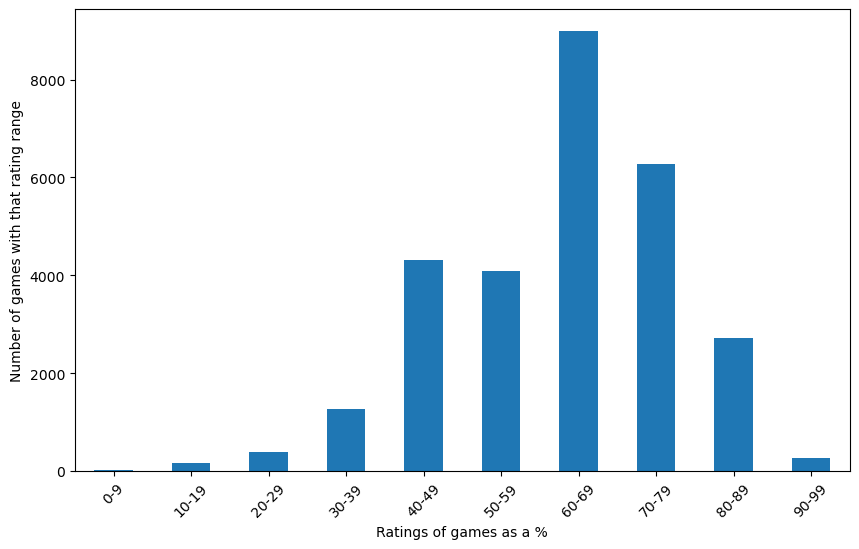

In [9]:
#plot the rating bins vs the number of games in that bin
figure1 = bin_counts.plot(kind='bar',figsize=(10, 6))
figure1.set_xlabel("Ratings of games as a %")
figure1.set_ylabel('Number of games with that rating range')
figure1.set_xticks(range(len(bin_counts)), labels=[f'{x}-{x+9}' for x in range(0, 100, 10)], rotation=45)